# Project1: Get to know the data
Project1 introduces you the Fashion Mnist dataset with some useful preprocessing and visualization methods, and covers Support Vectors Classification (SVC) for this dataset.

In [1]:
import os
import sys
sys.path.append("../../homework")
import matplotlib.pyplot as plt
import numpy as np


## Fashion Mnist 
Read [here](https://github.com/zalandoresearch/fashion-mnist) to learn more about the Fashion Mnist  dataset. 

In [2]:
# Load the Fashion Mnist  data
import mnist_reader
trainX, trainy = mnist_reader.load_mnist('../data/', kind='train')
testX, testy = mnist_reader.load_mnist('../data/', kind='t10k')


In [3]:
# Print some statistics about the data
print("train image data shape:", trainX.shape)
print("train label data shape:", trainy.shape)
print("test image data shape:", testX.shape)
print("test label data shape:", testy.shape)

train image data shape: (60000, 784)
train label data shape: (60000,)
test image data shape: (10000, 784)
test label data shape: (10000,)


## 1. Visualize the flattened data (20 Points)
The 28x28 Fashion Mnist images have been flattened as 784 x 1 image vectors.

Flattening the data will lead to some loss of information (such as spatial correlation between pixels) but it is nevertheless useful for training some linear classifiers.

Write some code below to visualize the training “flattened” data. Please provide a brief analysis about the characteristics of flattened data from visualization.

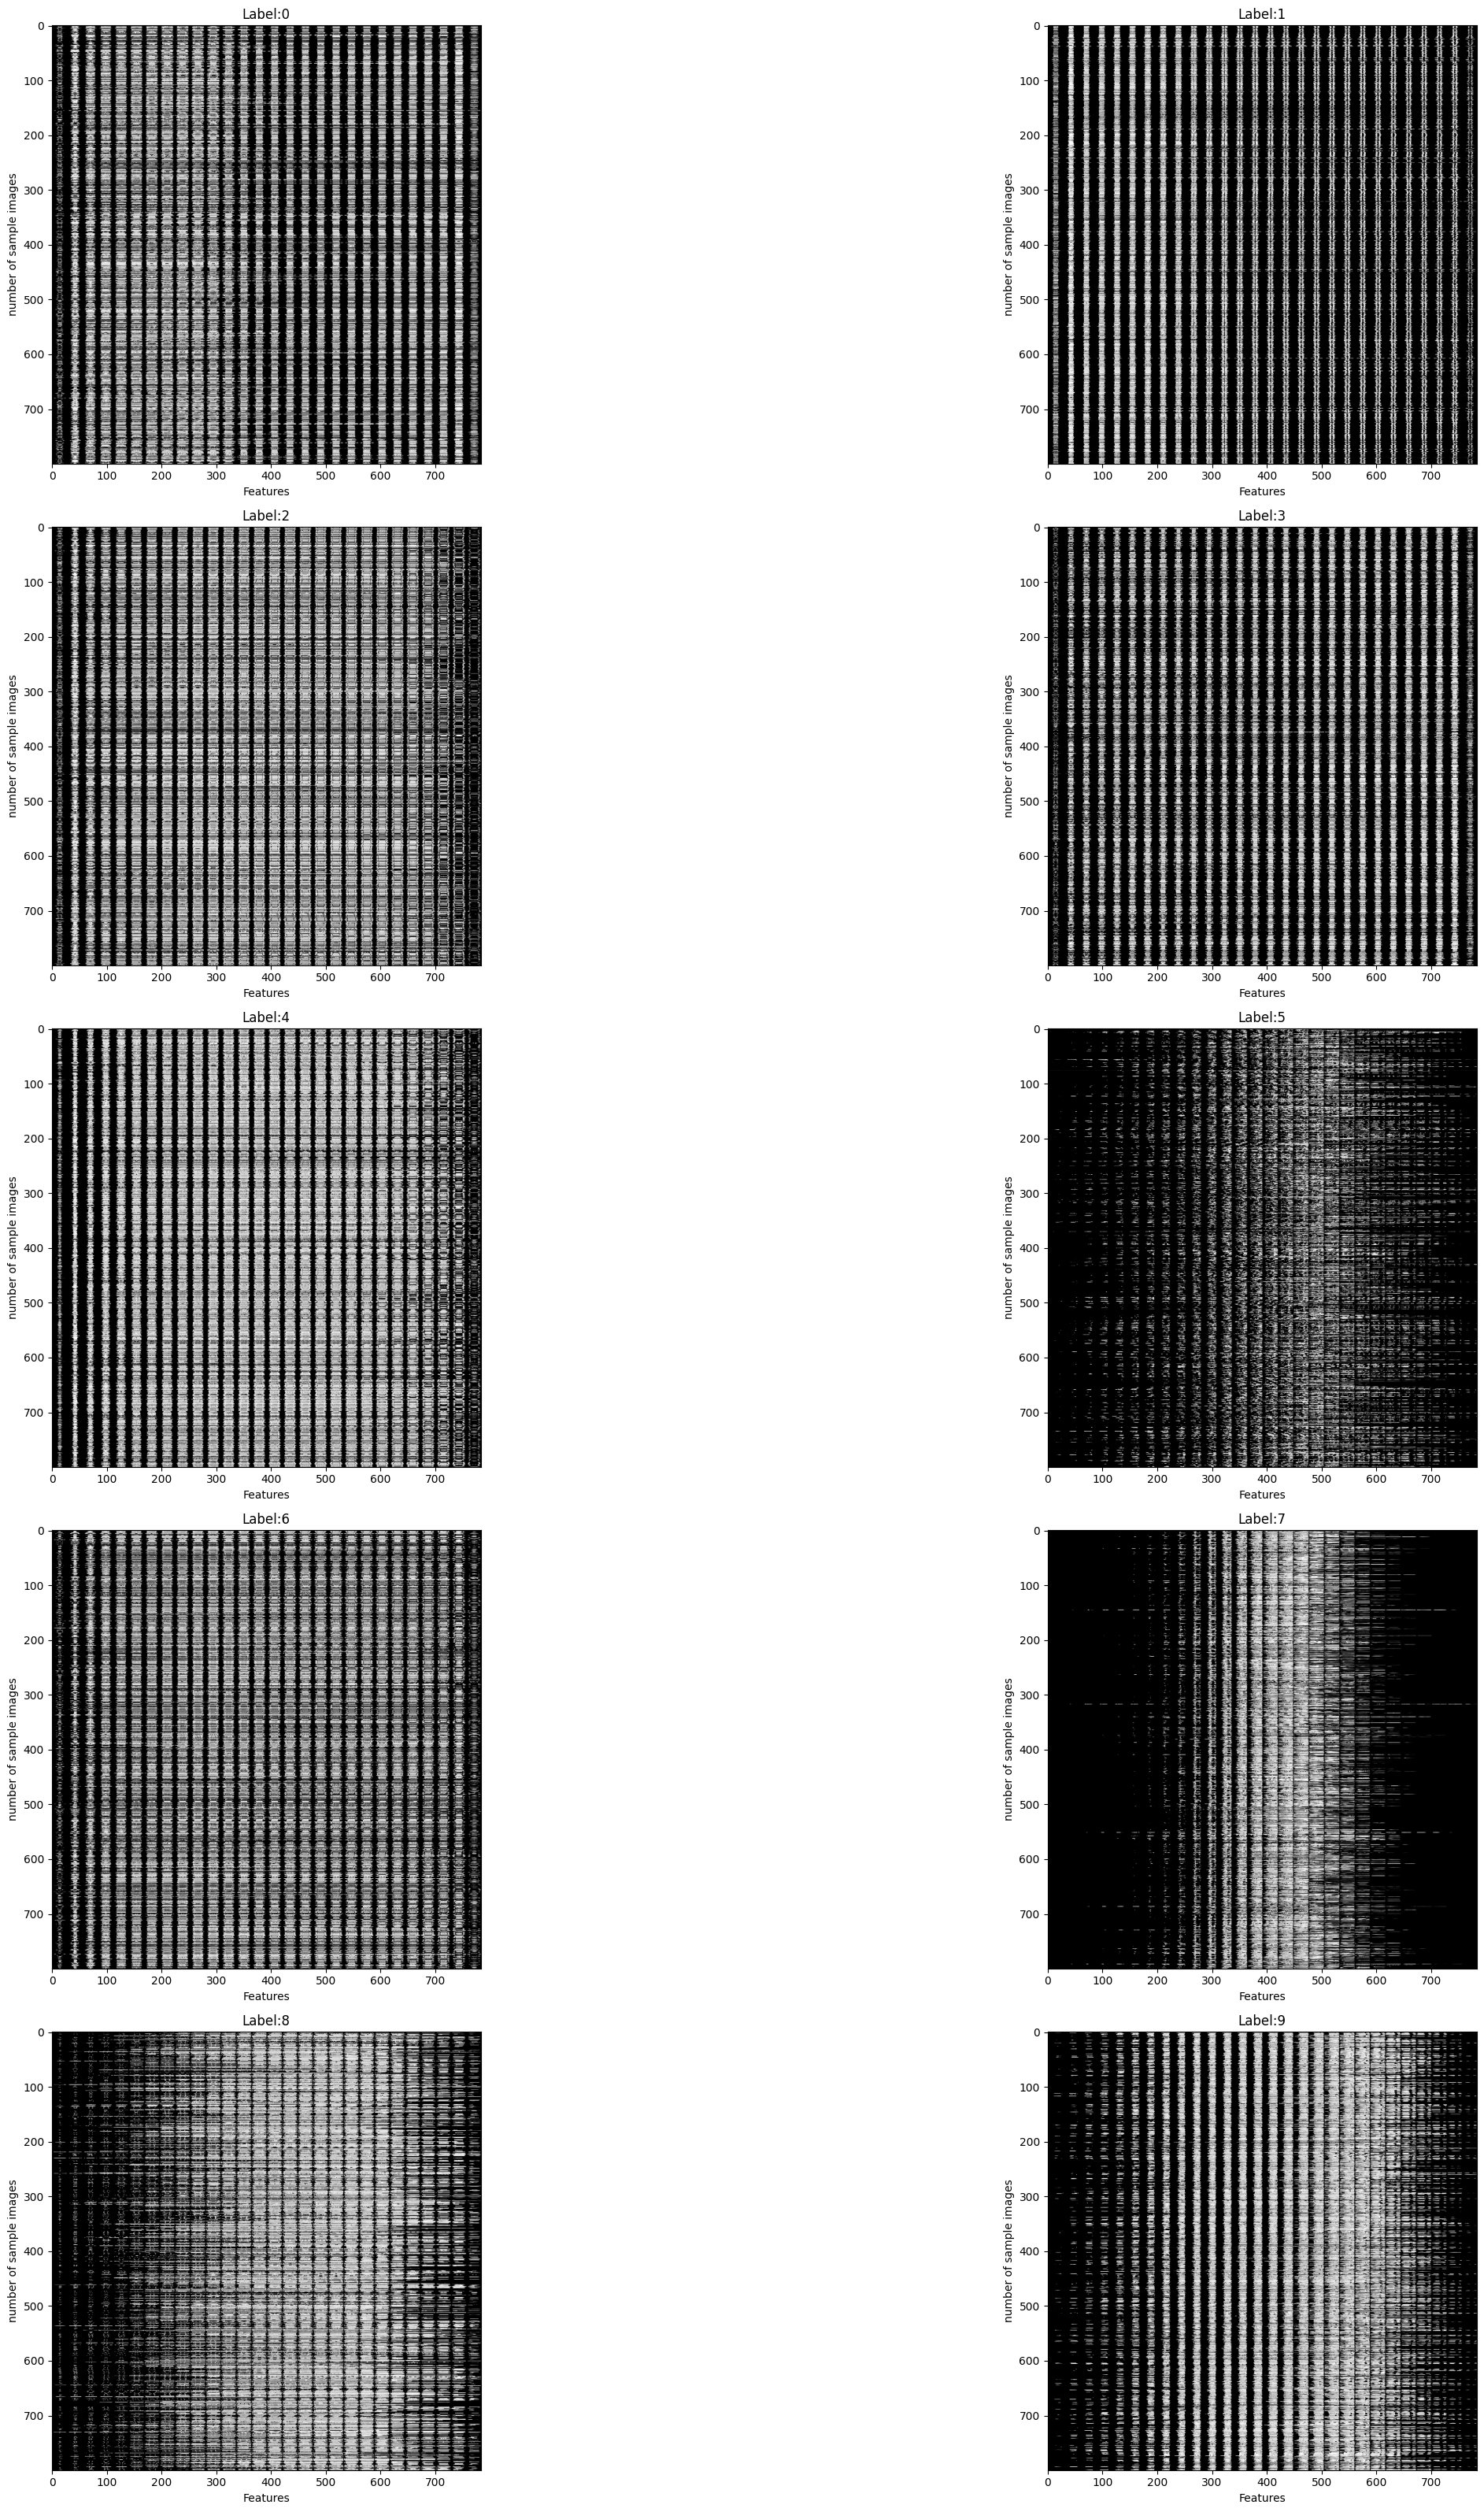

In [4]:
######################################################################
# TODO:                                                              #
# Visualize the data to analyze the characteristics of flattened data#
######################################################################
# your code
######################################################################

'''
Get the number of features
'''
count_train, count_feature = trainX.shape
count_test = testX.shape[0]
NUM_SAMPLE = 800 # Sample space, only select NUM_SAMPLE vector for each class
NUM_CLASS = np.unique(trainy).shape[0] #Total classes. There are 10 classes
fig_1 = plt.figure(figsize=(32,32))
'''
Iterate all clases. Random choice NUM_SAMPLE row from train image
'''
for i in range(NUM_CLASS):
    # Initialze the image
    img = np.zeros((NUM_SAMPLE,count_feature))
    # Only select one type of image
    tmp_train = trainX[np.where(trainy == i)]
    # random generate index
    tmp_idx = np.random.choice(np.arange(tmp_train.shape[0]),size=NUM_SAMPLE,replace=False)
    # select img from tmp_train
    img = tmp_train[tmp_idx]
    # show image
    plt.subplot(5,2,i+1)
    plt.xlabel('Features')
    plt.ylabel('number of sample images')
    plt.title('Label:' + str(i))
    plt.imshow(img,cmap='gray')
plt.tight_layout()
#                       END OF YOUR CODE                             #
######################################################################

### Answer. 1
As the graph shown, each label has their own patterns. Although we lost some information after flatten the data, we can still distinguish between classes.

## 2. Visualize the 2D averaged data  (20 Points)
Please write some code to reshape the training flattened data back to 2D 28x28 images and plot every "average" images of classes 0-9. Please provide a brief analysis about the difference between the 2D images and flattened data of Fashion Mnist from visualization.

Text(0.5, 0.98, 'Average images')

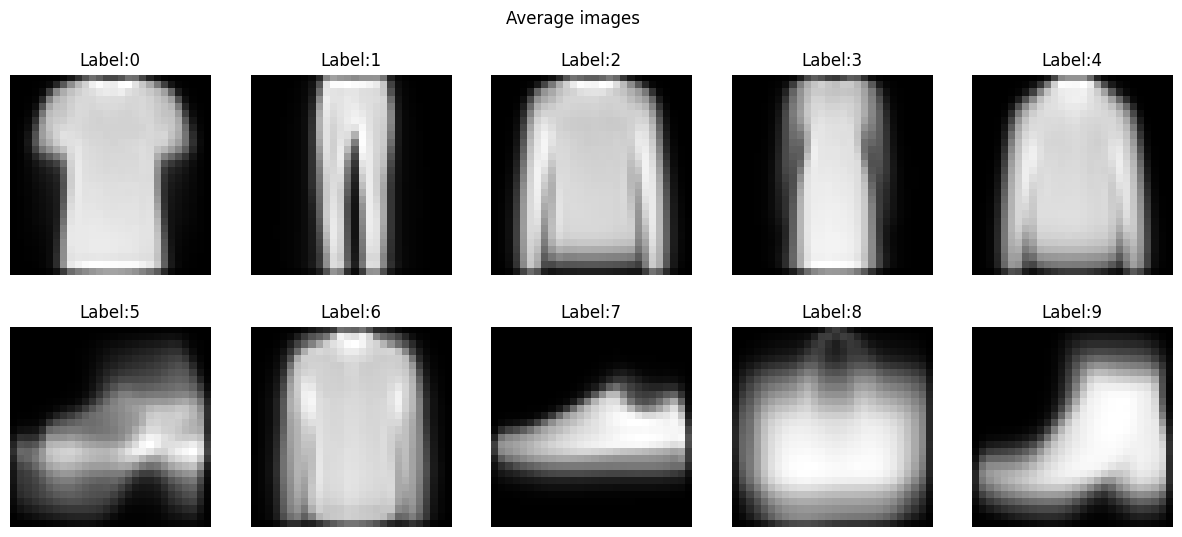

In [5]:
#####################################################################
# TODO:                                                             #
# Plot each "average image" of classes 0-9                          #
#####################################################################
# your code

fig_2=plt.figure(figsize=(15,6))
'''
calculate the average value, and plot the image
'''
for i in range(NUM_CLASS):
    ave_2d_img = np.mean(trainX[np.where(trainy==i)],axis=0)
    plt.subplot(2,5,i+1)
    plt.axis('off')
    plt.imshow(ave_2d_img.reshape(28,28),cmap='gray')
    plt.title('Label:' + str(i))
plt.suptitle('Average images')


#####################################################################
#                       END OF YOUR CODE                            #
#####################################################################

## 3. Implement PCA analysis for the flattened data (30 Points)
Please write some code to implement the Principle Component Analysis (PCA) analysis for the training flattened data, and plot the <font color=black>**first 100 points of**</font> the first principle component against the second principle component. Note: please plot the components in different colors according to their classes. The coordinate of each point is (first_principle_component, second_principle_component).

From the visualization, please give a brief discussion on whether the first principle component and second principle component is sufficient to classify the 10 classes of flattened data?

### 3.1 Normalized data to zero mean (5 Points)
In this step, please write a method to normalized the flatten data to zero mean one variance.

In [6]:
def Normalization(data) -> np.ndarray:
    # your code starts here
    normalized_data = (data - np.mean(data, axis=0)) / np.std(data,axis=0)
    #####################################################################
    #                       END OF YOUR CODE                            #
    #####################################################################
    return normalized_data
#test
output = Normalization(trainX)
print(output.mean(),output.std())

-1.8899470046408106e-18 1.000000000000002


### 3.2 PCA implementation using numpy (15 Points)
In this step, please implement the PCA using numpy.

In [7]:
#####################################################################
# TODO:                                                             #
# Implement PCA analysis for the 2D flattened data  
# Hint: You can only use numpy to implement the codes for PCA
#     use np.linalg.eig             
#####################################################################

def PCA(trainX, k): # k is the number of new dimensions 
    norm_X = Normalization(trainX)
    
    # your code starts here

    # Calculate the covariance matrix
    cov_mat = np.dot(norm_X.T,norm_X)

    # Calculate the eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
    # Sort the eigen values and eigen vectors
    tmp_idx = np.argsort(eigenvalues)[::-1] # Use [::-1] to reverse the list, sort from highest to lowest
    sorted_eigenvectors = eigenvectors[:,tmp_idx]

    # Get the new data
    new_data = np.dot(norm_X,sorted_eigenvectors)
    #####################################################################
    #                       END OF YOUR CODE                            #
    #####################################################################
    return new_data[:,:k],eigenvalues
#test
output,eigenvalues = PCA(trainX,2)


### 3.3 Ploting of the principle components. (10 Points)
In this step, please plot the first and second principle components of the first 100 samples using matplotlib. 

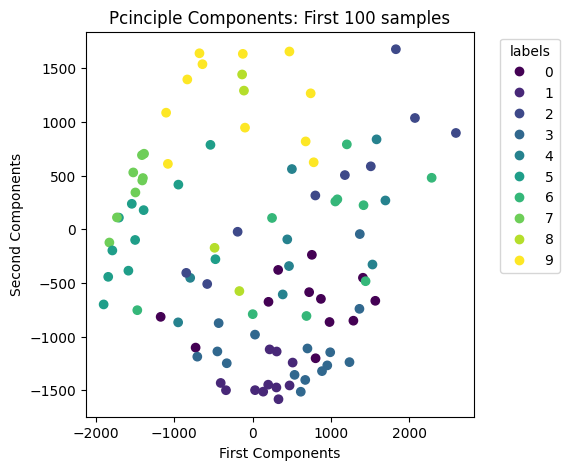

In [8]:
#####################################################################
# TODO:                                                             #
# PCA analysis for the 2D flattened data  
# Hint: from sklearn.decomposition import PCA
#       use PCA(svd_solver='auto').fit_transform(trainX) 
#       to compute the PCA of trainX                                #
#####################################################################
# your code starts here
# Import the PCA packet
from sklearn.decomposition import PCA

# Fit the model
pca_operation = PCA(n_components=2,svd_solver='auto')
pca_operation.fit(trainX)
# Apply model, get new data
pca_new_data = pca_operation.transform(trainX)
fig_3 = plt.figure(figsize=(5,5))
scatter = plt.scatter(pca_new_data[:100,0],pca_new_data[:100,1],c=trainy[:100])
plt.title('Pcinciple Components: First 100 samples')
plt.xlabel('First Components')
plt.ylabel('Second Components')
plt.legend(*scatter.legend_elements(),loc='upper left', title='labels',bbox_to_anchor=(1.05,1.0))

#####################################################################
#                       END OF YOUR CODE                            #
#####################################################################


### Verify custom PCA function
To verify my own PCA function, compare output data from `sklearn` and `PCA`. In this section, I modify the imput data to `sklearn PCA`:
- Original train data
- Normolize the train data to zero mean
- Normolize the train data to zero mean and unit variance 

In [9]:
# Generate three types of data
original_data = trainX
zero_mean_data = trainX - np.mean(trainX,axis=0)
zero_mean_unit_var = Normalization(trainX)

# Apply sklearn PCA function
# Fit the model
pca_operation = PCA(n_components=2,svd_solver='auto')
pca_operation.fit(original_data)
original_data = pca_operation.transform(original_data)

pca_operation = PCA(n_components=2,svd_solver='auto')
pca_operation.fit(zero_mean_data)
zero_mean_data = pca_operation.transform(zero_mean_data)

pca_operation = PCA(n_components=2,svd_solver='auto')
pca_operation.fit(zero_mean_unit_var)
zero_mean_unit_var = pca_operation.transform(zero_mean_unit_var)

# Compare three types of data, only show first 4 data
print(f'Orignal data:\n {original_data[:4]}')
print(f'Zero mean:\n {zero_mean_data[:4]}')
print(f'Zero mean, unit variance:\n {zero_mean_unit_var[:4]}')
# Print my own PCA function result
print(f'Custom PCA function:\n {output[:4]}')

Orignal data:
 [[ -123.99379079  1633.07439599]
 [ 1407.92885252  -451.64133561]
 [ -725.91079524 -1101.83813753]
 [   31.39866418  -981.06767214]]
Zero mean:
 [[ -123.99379079  1633.07439598]
 [ 1407.92885252  -451.64133562]
 [ -725.91079524 -1101.83813753]
 [   31.39866418  -981.06767214]]
Zero mean, unit variance:
 [[ -0.80117477  20.86674867]
 [ 17.07420598  -4.96851249]
 [ -9.60164085 -12.29610071]
 [ -0.31120632 -11.57676519]]
Custom PCA function:
 [[ -0.80117477 -20.86674867]
 [ 17.07420598   4.96851249]
 [ -9.60164085  12.29610071]
 [ -0.31120632  11.57676519]]


The results show that `sklearn PCA` will normalize the data to zero mean automatically. However, if we normalize data to zero mean and unit variance, our custom PCA function and `sklearn PCA` could same results. To verify this concluton, We can compare two arrays and take the difference.

In [10]:
print(f'sklearn PCA: difference between orignal data and zero mean data:\n {np.sum(original_data - zero_mean_data)}')
print(f'Custom PCA function and sklearn PCA function (input zero mean, unit variance data to sklearn PCA):\n {np.sum(output-zero_mean_unit_var)}')

sklearn PCA: difference between orignal data and zero mean data:
 5.514757539515358e-09
Custom PCA function and sklearn PCA function (input zero mean, unit variance data to sklearn PCA):
 4.831690603168681e-11


### Answer. 2
When number of components equals to 2, all the classes are mixed together, it's imposible to classify these data from 10 classes

## 4. Use Support Vectors Classification (SVC) to classify the principle components (PC) of training flattened data (30 Points)

Please write some code to train the Support Vectors Classification (SVC) using the <font color=black>**ALL Training Data**</font>. Then, evaluate the trained SCV on the test dataset. 

For each of the 100 nodes, its coordinate is (firstPC, secondPC).

### 4.1 Concatenate train and test data (5 Points)
In this step, please concatenate the train and test data for PCA, and get the principle components (PC with k = 2) of train and test data

In [11]:
def Concatenate(trainX,testX,k=2):
    # your code starts here
    # Concate the train and test data
    data_concate = np.concatenate((trainX,testX))
    # Fit the PCA model
    tmp_pca = PCA(n_components=k,svd_solver='auto')
    tmp_pca.fit(data_concate)
    # Apply the PCA, get new data
    norm_trainX = tmp_pca.transform(trainX)
    norm_testX = tmp_pca.transform(testX)

    # concate the eigenvalues
    eigenvalues = tmp_pca.explained_variance_
    # The variance ratio
    eigen_ratio = tmp_pca.explained_variance_ratio_

        
    #####################################################################
    #                       END OF YOUR CODE                            #
    #####################################################################
    return norm_trainX,norm_testX,eigenvalues,eigen_ratio
#test 
norm_trainX,norm_testX,eigenvalues,eigen_ratio = Concatenate(trainX,testX,2)
print(norm_trainX.shape,norm_testX.shape)

(60000, 2) (10000, 2)


### 4.2 Support Vectors Classification (SVC) (10 Points)

In this step, please write the code to train a SVC for classification. You may use the skelarn SVC.

In [12]:
from sklearn import svm
from sklearn.metrics import accuracy_score
norm_trainX,norm_testX,eigenvalues,eigen_ratio = Concatenate(trainX,testX,2)
def train_SVC(X, Y,testX,testY):
    #####################################################################
    # TODO:                                                             #
    # Hint: from sklearn import svm 
    #       please return the accuracy over the test set                #
    #####################################################################
    svc = svm.SVC()

    # your code starts here
    # Fit the SVC model
    svc.fit(X,Y)
    # Test the result, get the accuracy
    accuracy = svc.score(testX,testY)
    #####################################################################
    #                       END OF YOUR CODE                            #
    #####################################################################
    #return accuracy
    return accuracy
#test
print("test accuracy is {}".format(train_SVC(norm_trainX[:1000],trainy[:1000],norm_testX[:1000],testy[:1000])))

test accuracy is 0.528


### 4.3 Scree Plot of PCA component  (10 Points)

In this step, plot the [scree plot](https://en.wikipedia.org/wiki/Scree_plot#:~:text=The%20scree%20plot%20is%20used,known%20as%20a%20scree%20test.) displays of PCA to select the proper k for training SVC. Y axis is the cumulated variance, and x axis is the number of priciple components (PC). Please only plot the first 10 PC. 

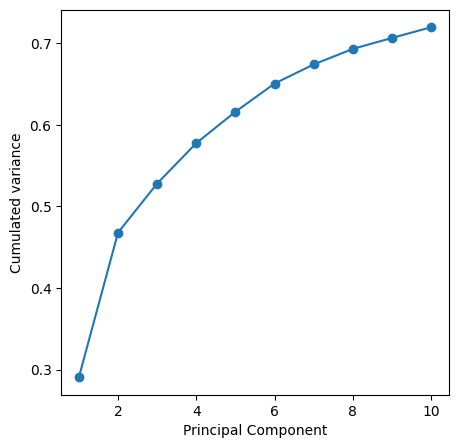

In [13]:
def plot_scree(trainX,trainy,testX,testy,k=2):
    no_components_to_cal = 10
    norm_trainX,norm_testX,eigenvalues,eigen_ratio = Concatenate(trainX,testX,no_components_to_cal)
    
    ### Your code starts here ###############################################################
    # plot the figure
    fig_4 = plt.figure(figsize=(5,5))
    # Plot cumulated variance
    var_cum = np.cumsum(eigen_ratio)
    plt.plot(np.arange(no_components_to_cal)+1,var_cum,'o-')
    plt.xlabel('Principal Component')
    plt.ylabel('Cumulated variance')

    ### Your code ends here #################################################################
#test 
plot_scree(trainX,trainy,testX,testy,k=2)

### 4.4 Retrain SVC based on the optimal k obtained from the scree plot (5 Points)

In this step, please choose the optimal k based on the scree plot to retrain the svc. k should be less of equal than 10. Please do it based on the methods you realized previously. Only Train and test first 1000 samples as we do in 4.2

In [14]:
def retrain_SVC(trainX,trainy,testX,testy):
    no_to_train = 1000
    no_to_test = 1000
    ### Your code starts here ###############################################################
    # select k = 10
    norm_trainX,norm_testX,eigenvalues,eigen_ratio = Concatenate(trainX,testX,10)
    # retrain the SVC
    accuracy = train_SVC(norm_trainX[:no_to_train],trainy[:no_to_train],norm_testX[:no_to_test],testy[:no_to_test])

    ### Your code ends here #################################################################
    return accuracy


#test
accuracy = retrain_SVC(trainX,trainy,testX,testy)
print("accuracy is {}".format(accuracy))

accuracy is 0.746


In your submission, in addition to the completed codes and the resulting images for the visualizations, also provide brief responses to the above questions and a brief analysis of the visualized data. 